# Make instantaneous plots

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt
import pandas as pd

# Make all plots inline 
#%matplotlib inline

import postproengine as ppeng

import imageio
import glob
import cv2

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load
    
def stringReplaceDict(s, dreplace):
    outstr = str(s)
    for k, g in dreplace.items():
        outstr=outstr.replace(k, str(g))
    return outstr
    
def formatTfig(fig,ax):
    ax.set_xlim([300, 301])
    return

def addturbines(fig, ax):
    rundir = '/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA.perftest/'
    outputcsv = rundir + '/turbines_farmrun.csv'
    # Process the csv file
    df = pd.read_csv(outputcsv)
    # Fix the turbine types of the turbines
    for index, row in df.iterrows():
        ax.plot(row[' x'], row[' y'], 's', color='k', markersize=1)
    return

#ppeng.formatTfig = formatTfig
ppeng.addturbines = addturbines

In [3]:
replacedict={'RUNDIRA':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA/',
             'RUNDIR_A1':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA1/',
             'RUNDIR_A2':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA2/',
             'RUNDIR_A3':'/tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA3/',
             'NCPREFIX':'KP_z090hh',
            }

In [4]:
yamlstring="""
globalattributes:
  verbose: False
  executeorder:
  - instantaneousplanes

instantaneousplanes:
  - name: HHplot
    ncfile: 
    - RUNDIRA/post_processing/NCPREFIX_14400.nc
    - RUNDIR_A1/post_processing/NCPREFIX_37800.nc
    - RUNDIR_A2/post_processing/NCPREFIX_54000.nc
    - RUNDIR_A3/post_processing/NCPREFIX_72900.nc
    times: [7300, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 12000, 13000, 14000]
    iplane: 0
    xaxis: x #a1
    yaxis: y #a2
    # --- optional stuff here ---
    plot:
      title: 'ABL $U_h$ T={time:0.1f}s'
      plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"
      clevels: 'np.linspace(0, 12, 121)'
      postplotfunc: postproengine.addturbines
      #xscalefunc: 'lambda x: (x-126*4)/126.0'
      #yscalefunc: 'lambda y: (y-126*2)/126.0'
      xlabel: 'UTM X [m]'
      ylabel: 'UTM Y [m]'
      cbar_nticks: 13
      fontsize: 10
      figsize: [8,6]
      dpi: 125
      #plotturbines:
      #- basexyz: [0,0,0]
      #  hubheight: 1.1
      #  rotordiameter: 1
      #  nacelledir: 270
      Xsavefile: movieframes/hubheight_{time:0.1f}.png
      Xsavefile: movieframes/KP_z090h_{time:0.1f}.png
"""
f = io.StringIO(stringReplaceDict(yamlstring, replacedict))
yamldict = Loader(f, **loaderkwargs)
#yamldict['instantaneousplanes'][0]['times']=np.arange(7200, 8126, 2)
#yamldict['instantaneousplanes'][0]['times']=np.arange(7200, 7256, 1)

Initialized instantaneousplanes
Running instantaneousplanes
Extracting from ncfile:  /tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA//post_processing/KP_z090hh_14400.nc 0
extracting iter 100
extracting iter 800
extracting iter 1300
extracting iter 1800
extracting iter 2300
Already processed itime:  2800
Already processed itime:  3300
Already processed itime:  3800
Already processed itime:  4800
Already processed itime:  5800
Already processed itime:  6800
Extracting from ncfile:  /tscratch/lcheung/AWAKEN/Benchmark1/Phase3/FarmRuns/BM3_FarmRunProd1_runA1//post_processing/KP_z090hh_37800.nc 1
Already processed itime:  100
Already processed itime:  800
Already processed itime:  1300
Already processed itime:  1800
Already processed itime:  2300
extracting iter 2800
extracting iter 3300
extracting iter 3800
Already processed itime:  4800
Already processed itime:  5800
Already processed itime:  6800
Extracting from ncfile:  /tscratch/lcheung/AWAKEN/Benchmark1/Phase3

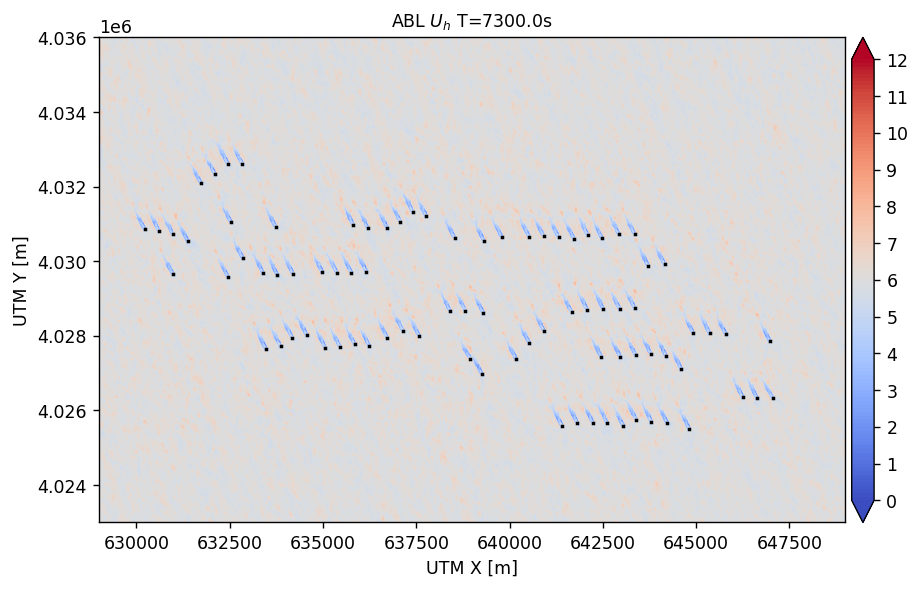

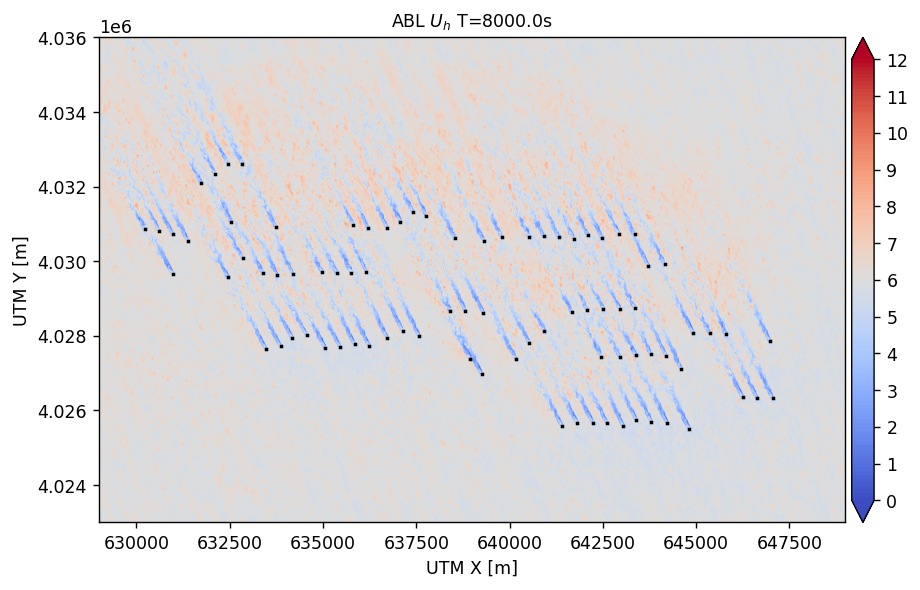

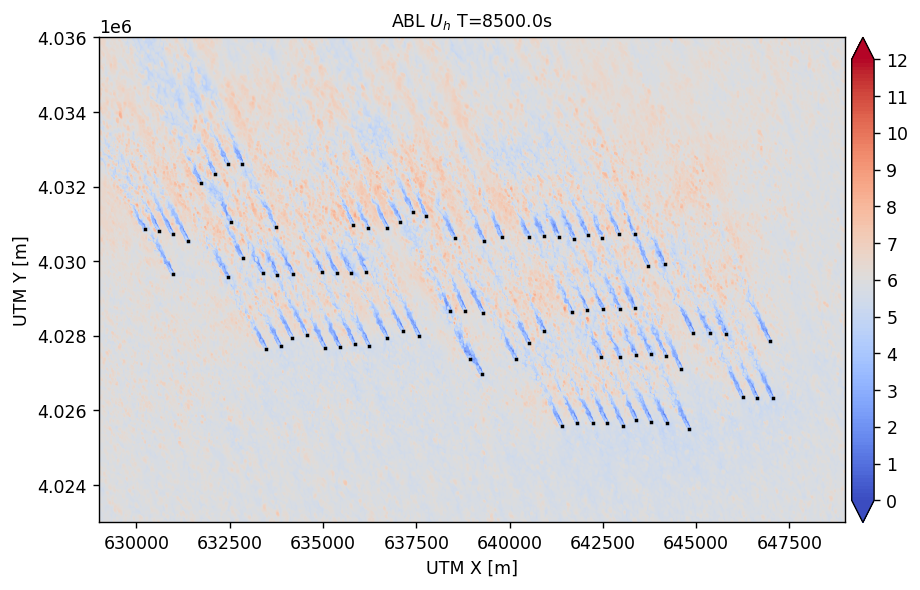

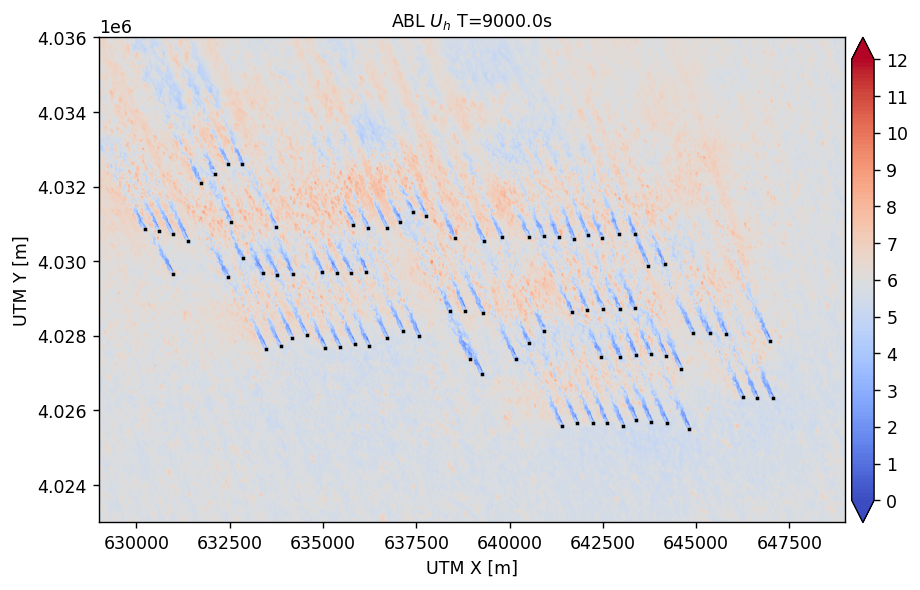

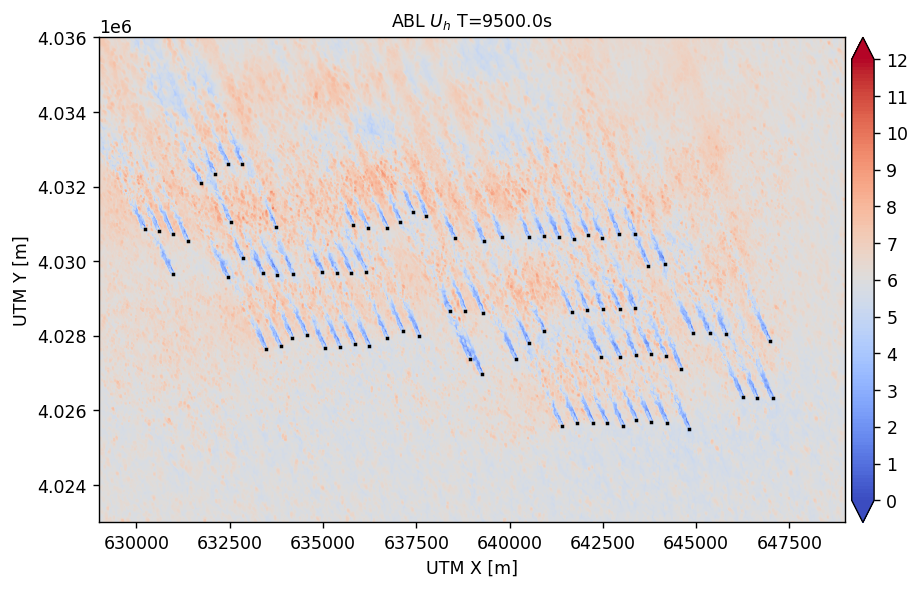

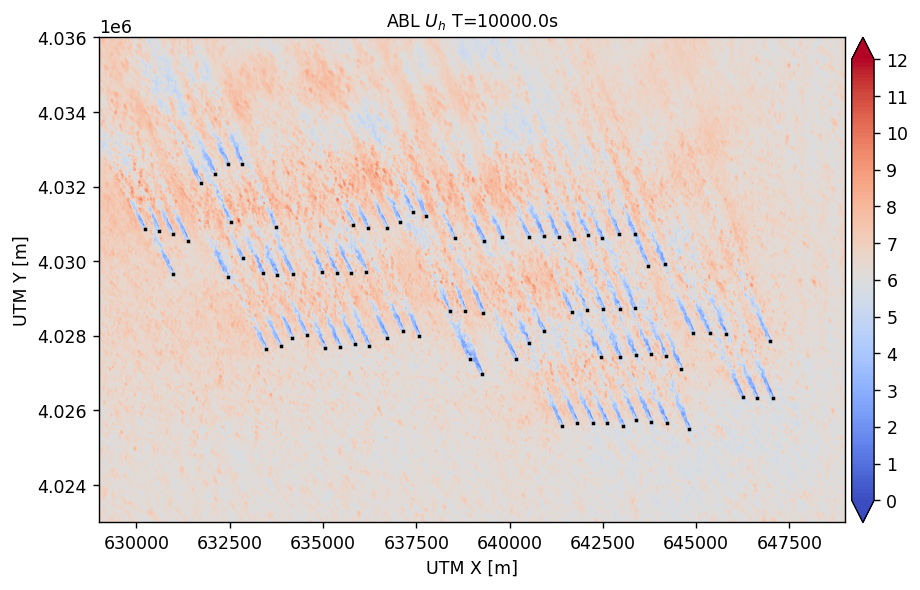

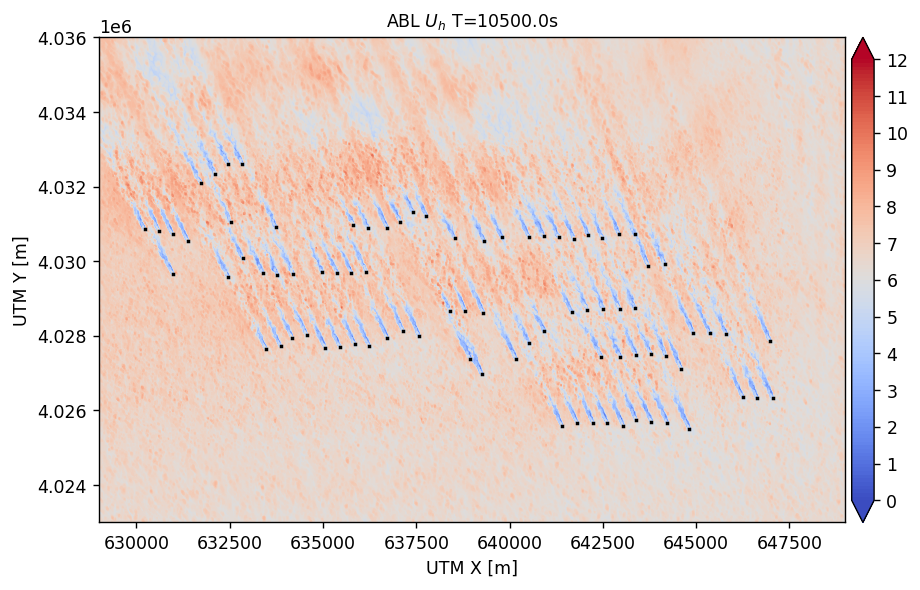

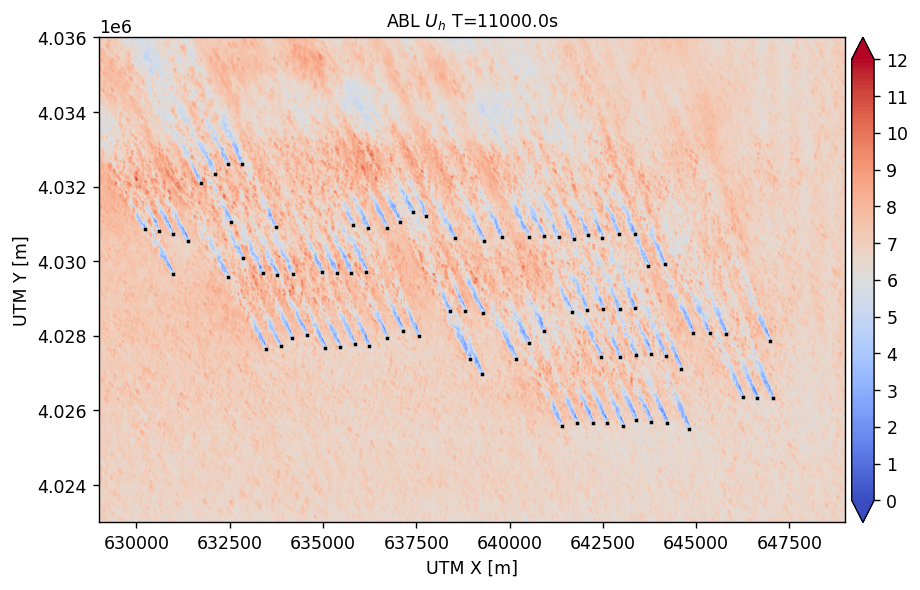

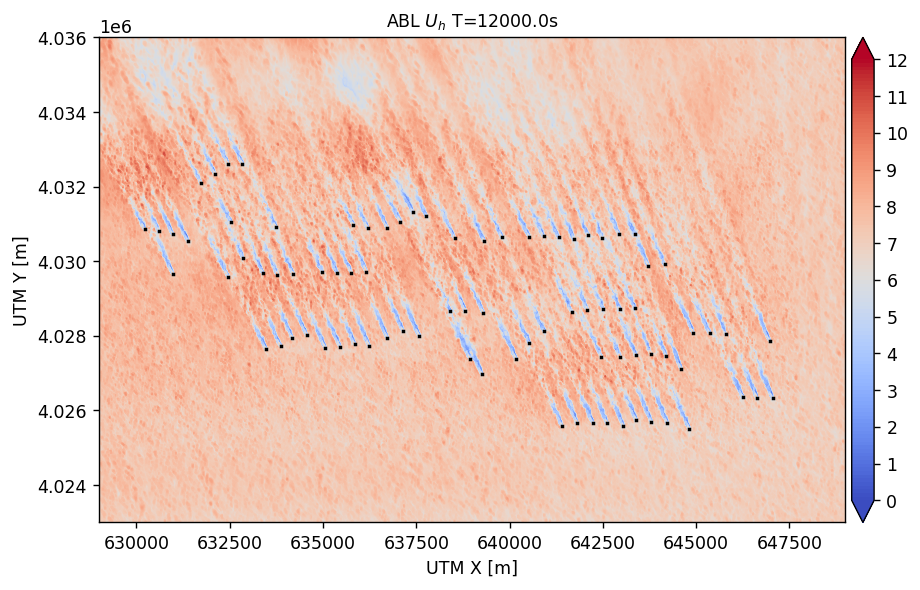

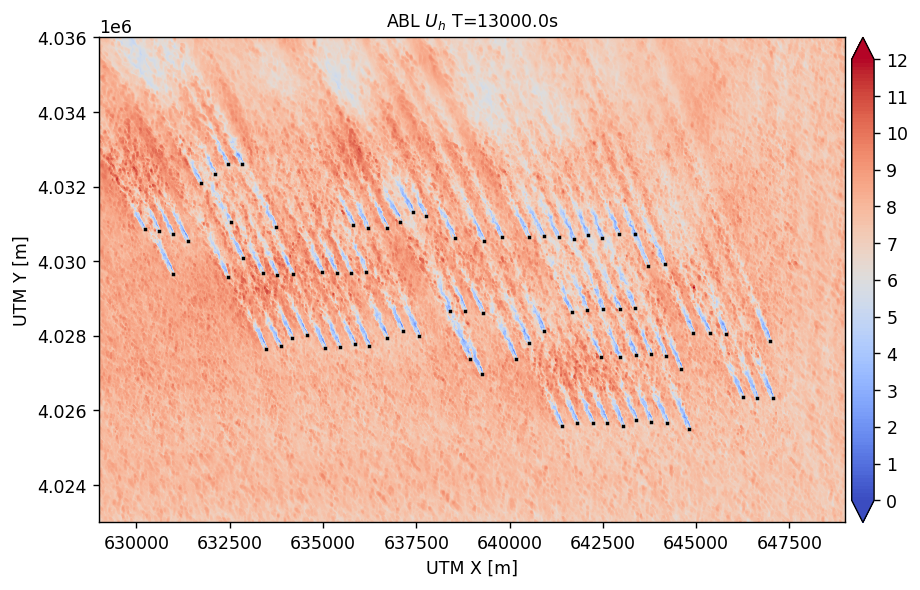

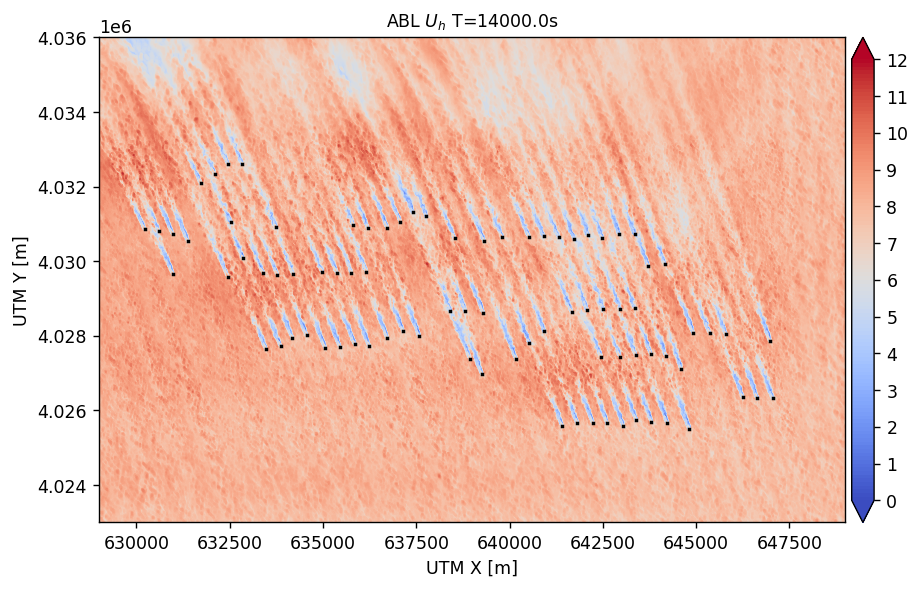

In [5]:
#%%capture
# Run the driver
ppeng.driver(yamldict, verbose=True)

## Make a movie version of the images

In [6]:
yamlstring2="""
globalattributes:
  verbose: False
  executeorder:
  - MakeAMovie

MakeAMovie:
  instantaneousplanes:
  - name: HHplot
    ncfile: 
    - RUNDIRA/post_processing/NCPREFIX_14400.nc
    - RUNDIR_A1/post_processing/NCPREFIX_37800.nc
    - RUNDIR_A2/post_processing/NCPREFIX_54000.nc
    - RUNDIR_A3/post_processing/NCPREFIX_72900.nc
    times: []
    iplane: 0
    xaxis: x #a1
    yaxis: y #a2
    # --- optional stuff here ---
    XXXplotXXX:
      title: 'ABL $U_h$ T={time:0.1f}s'
      plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"
      clevels: 'np.linspace(0, 12, 121)'
      postplotfunc: postproengine.addturbines
      #xscalefunc: 'lambda x: (x-126*4)/126.0'
      #yscalefunc: 'lambda y: (y-126*2)/126.0'
      xlabel: 'UTM X [m]'
      ylabel: 'UTM Y [m]'
      cbar_nticks: 13
      fontsize: 10
      figsize: [8,6]
      dpi: 125
      #plotturbines:
      #- basexyz: [0,0,0]
      #  hubheight: 1.1
      #  rotordiameter: 1
      #  nacelledir: 270
      #savefile: movieframes/hubheight_{time:0.1f}.png
      savefile: movieframes/NCPREFIX_{time:0.1f}.png
    
    ## this creates a GIF version of the movie
    makegif:
      name:  movieframes/NCPREFIX.gif
      fps: 5
      imagefilename: movieframes/NCPREFIX_{time:0.1f}.png
      times: np.arange(7200, 14000, 100)
"""
f = io.StringIO(stringReplaceDict(yamlstring2, replacedict))
yamldict2 = Loader(f, **loaderkwargs)
yamldict2['MakeAMovie']['instantaneousplanes'][0]['times']=np.arange(7200, 14300, 100)

In [7]:
%%capture
# Run the driver
ppeng.driver(yamldict2, verbose=True)